# Forecasting Growth on Other Stocks
- Used examples of both positive and negative growth stocks
- They include:
    1. American Airlines (AAL)
    2. Amazon (AMZN)
    3. General Electric (GE)
    4. Intel (INTC)
    5. Tesla (TSLA)

In [1]:
from Functions import *

In [7]:
# Container Variables for Results
stocks = ['American Airlines','Amazon','General Electric', 'Intel','Tesla']
base_rmses = []
auto_rmses = []
prophet_rmses = []
rois = []

# American Airlines

## Base Model

In [3]:
aal = pd.read_csv('Data/AAL.csv')
aal.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-14,43.009998,43.610001,42.980000,43.400002,41.938862,7773600
1,2016-11-15,45.000000,45.279999,43.590000,44.759998,43.253075,13166600
2,2016-11-16,44.660000,44.799999,43.930000,44.450001,42.953514,6167000
3,2016-11-17,44.389999,45.849998,44.049999,45.830002,44.287056,8558700
4,2016-11-18,46.150002,46.490002,45.619999,46.259998,44.702576,7795100


In [4]:
arima_aal = base_model(aal,exog=True,logged=False,mse=True)

Test RMSE:  11.365709622494357


In [5]:
arima_aal_log = base_model(aal,exog=True,logged=True,mse=True)

Test RMSE:  8.924438661392783


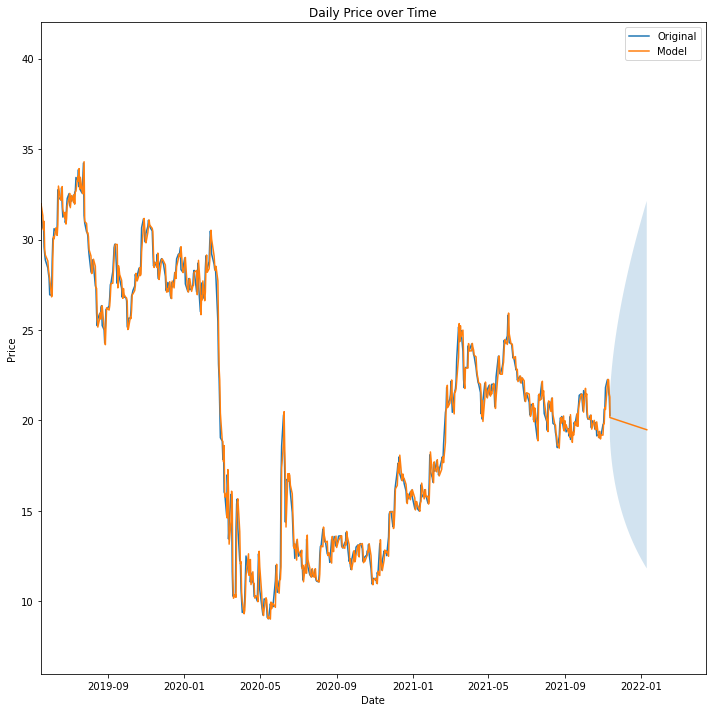

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1259
Model:               SARIMAX(1, 1, 1)   Log Likelihood                2423.741
Date:                Sun, 14 Nov 2021   AIC                          -4839.482
Time:                        17:59:13   BIC                          -4818.933
Sample:                             0   HQIC                         -4831.759
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0006      0.001     -0.510      0.610      -0.003       0.002
ar.L1          0.0087      0.153      0.057      0.954      -0.291       0.308
ma.L1          0.1057      0.153      0.691      0.4

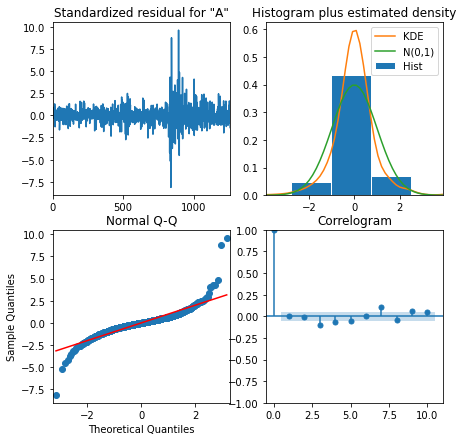

In [13]:
arima_aal_full_log, arima_aal_roi = base_model(aal,exog=True,logged=True,mse=True,summary=True,
                                               plotting=True, full=True, roi=True, return_roi=True)

## Auto Arima Model

In [8]:
auto_aal = create_auto_arima(aal,exog=True,logged=False,mse=True)
auto_aal_log = create_auto_arima(aal,exog=True,logged=True,mse=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2474.544, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2472.661, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2470.437, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2470.331, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2471.742, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2472.309, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2472.282, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2473.823, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2469.275, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2471.259, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2471.240, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2469.374, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2472.851, Time=0.18 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.526 seconds
Test RMSE:  6.49339617

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-4858.689, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4827.176, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4840.990, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4841.475, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4828.843, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-4841.642, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-4849.495, Time=0.96 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-4854.318, Time=1.26 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-4857.244, Time=1.27 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4839.482, Time=0.43 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-4850.974, Time=0.60 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-4856.786, Time=1.00 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-4855.486, Time=1.52 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-4861.535, Time=0.45 sec
 ARIMA(1,1,2)(0,0,0

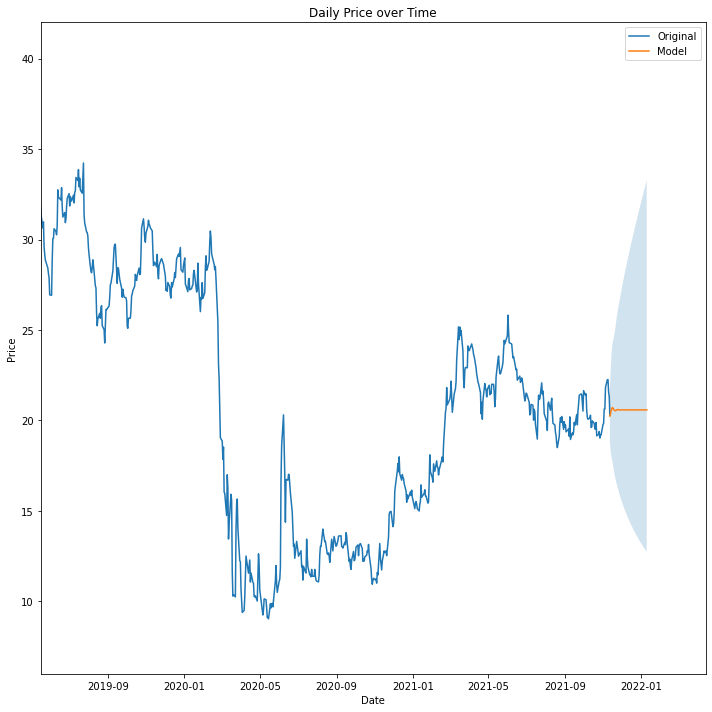

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1259
Model:               SARIMAX(2, 1, 2)   Log Likelihood                2435.768
Date:                Sun, 14 Nov 2021   AIC                          -4861.535
Time:                        17:59:43   BIC                          -4835.849
Sample:                             0   HQIC                         -4851.882
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1984      0.063     19.035      0.000       1.075       1.322
ar.L2         -0.6316      0.066     -9.621      0.000      -0.760      -0.503
ma.L1         -1.1023      0.074    -14.942      0.0

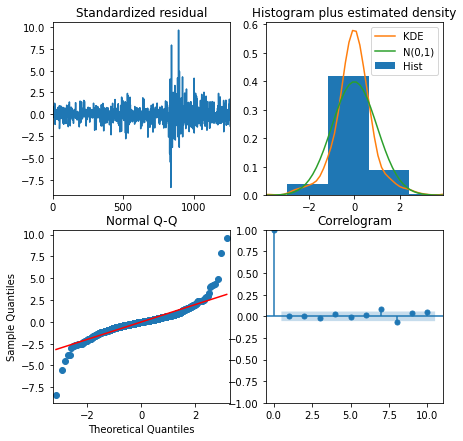

In [15]:
auto_aal_full_log, auto_aal_roi = create_auto_arima(aal,exog=True,logged=True,mse=True,summary=True,
                                               plotting=True, full=True, roi=True, return_roi=True)

## Facebook Prophet Model

In [16]:
fb_aal = create_prophet(aal,exog=False,logged=False,mse=True)
fb_aal_log = create_prophet(aal,exog=False,logged=True,mse=True)

Test RMSE: 28.199373463885628
Test RMSE: 14.747956256682585


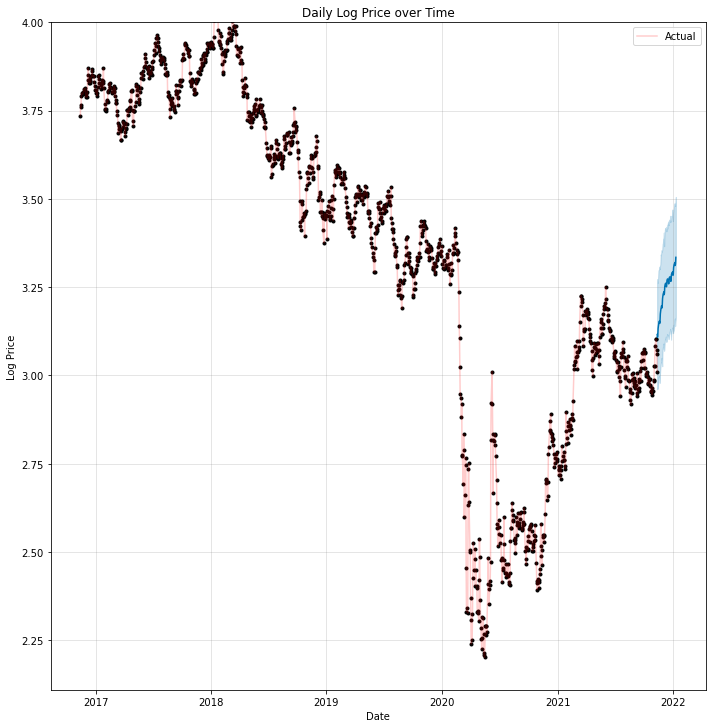

ROI:  10.78 %


In [17]:
fb_aal_full_log, fb_aal_roi = create_prophet(aal,logged=True,full=True,plotting=True,roi=True,return_roi=True)

## Findings

# Amazon

## Base Model

## Auto Arima Model

## Facebook Prophet Model

## Findings

# General Electric

## Base Model

## Auto Arima Model

## Facebook Prophet Model

## Findings

# Intel

## Base Model

## Auto Arima Model

## Facebook Prophet Model

## Findings

# Tesla

## Base Model

## Auto Arima Model

## Facebook Prophet Model

## Findings